In [196]:
# Project 1 (Customer Service Requests analysis)

In [13]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import scipy.stats as stats
import sklearn

In [14]:
nyc_data = pd.read_csv('D:\\SIMPLILEARN\\Data Science with Python\\311_Service_Requests_from_2010_to_Present.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
nyc_data.describe

<bound method NDFrame.describe of         Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM           01-01-16 0:55   NYPD   
1         32309934  12/31/2015 11:59:44 PM           01-01-16 1:26   NYPD   
2         32309159  12/31/2015 11:59:29 PM           01-01-16 4:51   NYPD   
3         32305098  12/31/2015 11:57:46 PM           01-01-16 7:43   NYPD   
4         32306529  12/31/2015 11:56:58 PM           01-01-16 3:24   NYPD   
...            ...                     ...                     ...    ...   
300693    30281872  03/29/2015 12:33:41 AM                     NaN   NYPD   
300694    30281230  03/29/2015 12:33:28 AM  03/29/2015 02:33:59 AM   NYPD   
300695    30283424  03/29/2015 12:33:03 AM  03/29/2015 03:40:20 AM   NYPD   
300696    30280004  03/29/2015 12:33:02 AM  03/29/2015 04:38:35 AM   NYPD   
300697    30281825  03/29/2015 12:33:01 AM  03/29/2015 04:41:50 AM   NYPD   

                            Agency Name  

In [16]:
# Here we can also use nyc_data.columns
print (nyc_data.columns.values)

['Unique Key' 'Created Date' 'Closed Date' 'Agency' 'Agency Name'
 'Complaint Type' 'Descriptor' 'Location Type' 'Incident Zip'
 'Incident Address' 'Street Name' 'Cross Street 1' 'Cross Street 2'
 'Intersection Street 1' 'Intersection Street 2' 'Address Type' 'City'
 'Landmark' 'Facility Type' 'Status' 'Due Date' 'Resolution Description'
 'Resolution Action Updated Date' 'Community Board' 'Borough'
 'X Coordinate (State Plane)' 'Y Coordinate (State Plane)'
 'Park Facility Name' 'Park Borough' 'School Name' 'School Number'
 'School Region' 'School Code' 'School Phone Number' 'School Address'
 'School City' 'School State' 'School Zip' 'School Not Found'
 'School or Citywide Complaint' 'Vehicle Type' 'Taxi Company Borough'
 'Taxi Pick Up Location' 'Bridge Highway Name' 'Bridge Highway Direction'
 'Road Ramp' 'Bridge Highway Segment' 'Garage Lot Name' 'Ferry Direction'
 'Ferry Terminal Name' 'Latitude' 'Longitude' 'Location']


In [17]:
# Now our project objective is to focus on the data wrangling techniques to understand the pattern in the data and
#also visualize the major complaint types.
# Now here i'm finding how many columns has how many null values.
nyc_data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [18]:
# Now here we can see many columns which has many null values so droping these columns
nyc_data.drop(['School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
               'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp','Bridge Highway Segment', 'Garage Lot Name',
               'Ferry Direction','Ferry Terminal Name','Landmark'],axis=1, inplace=True)
print (nyc_data.shape)


(300698, 41)


In [19]:
# Here Intersection street 1 and 2 have approx 256840 missing data so filling the NaN values.
nyc_data['Intersection Street 1'].fillna(value="Street not specified",inplace=True)
nyc_data['Intersection Street 2'].fillna(value="Street not specified",inplace=True)

# Here Incident Address ,Street Name,Cross Street 1,Cross Street 2 also have missing data for approx 44000 entries so
#filling them also.
nyc_data['Incident Address'].fillna(value="Street not specified",inplace=True)
nyc_data['Street Name'].fillna(value="Street not specified",inplace=True)
nyc_data['Cross Street 1'].fillna(value="Street not specified",inplace=True)
nyc_data['Cross Street 2'].fillna(value="Street not specified",inplace=True)
nyc_data['Descriptor'].fillna(value='Not specified',inplace=True)
nyc_data['Location Type'].fillna(value='Not Specified',inplace=True)
nyc_data['City'].fillna(value='Unknown Specified',inplace=True)
nyc_data['Address Type'].fillna(value='Address not given',inplace=True)


In [20]:
# Since X coordinate , Y coordinate , Latitide,Longitude,location have 3540 missing values so we cant fill them by just NA values
# or by using any mathematical operation like mean,median,mode so we drop theses entries.
nyc_data.dropna(subset=['X Coordinate (State Plane)','Y Coordinate (State Plane)',
                        'Latitude','Longitude','Location'], inplace=True)

# 41 city and incident zip is also not given so dropping them as 
nyc_data.dropna(subset=['City','Incident Zip'],inplace=True)

print (nyc_data.shape)


(297117, 41)


In [21]:
# Columns like ('Park Facility Name','School Name', 'School Number', 'School Region', 'School Code','School Phone Number',
# 'School Address', 'School City', 'School State','School Zip') all values are filled with unspecified  and 'School not found' 
# with N so these columns are of no use of us so dropping them.

nyc_data.drop(['Park Facility Name','School Name', 'School Number', 'School Region', 'School Code','School Phone Number', 
               'School Address', 'School City', 'School State','School Zip','School Not Found'],axis=1,inplace=True)

In [22]:
print (nyc_data.shape)

(297117, 30)


In [23]:
# Now our data is cleaned so we can proceed for further process

In [34]:
nyc_data['Created Date']=pd.to_datetime(nyc_data['Created Date'])
nyc_data['Closed Date']=pd.to_datetime(nyc_data['Closed Date'])
print(nyc_data.head())

#Now making a seperate column for Request_Closing_time
nyc_data['Request_Closing_Time']= nyc_data['Closed Date']-nyc_data['Created Date']
nyc_data["Request_Closing_Hours"]=nyc_data["Request_Closing_Time"].astype("timedelta64[h]")+1
nyc_data["Request_Closing_minutes"]=nyc_data["Request_Closing_Time"].astype("timedelta64[m]")
nyc_data['Request_Closing_Time_in_seconds'] = nyc_data['Request_Closing_Time'].apply(lambda x : x.seconds)

   Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:00   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:00   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:00   NYPD   
3    32305098 2015-12-31 23:57:46 2016-01-01 07:43:00   NYPD   
4    32306529 2015-12-31 23:56:58 2016-01-01 03:24:00   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Stree

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Hours,Request_Closing_minutes,Request_Closing_Time_in_seconds
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,1.0,55.0,3315.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,2.0,86.0,5176.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,5.0,291.0,17491.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,8.0,465.0,27914.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,4.0,207.0,12422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,...,986640.0,200154.0,MANHATTAN,40.716053,-73.991378,"(40.71605290789855, -73.99137850370803)",0 days 00:38:29,1.0,38.0,2309.0
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,1026931.0,192185.0,QUEENS,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31,3.0,120.0,7231.0
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,999713.0,194161.0,BROOKLYN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17,4.0,187.0,11237.0
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,1030021.0,244520.0,BRONX,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33,5.0,245.0,14733.0


In [35]:
print(nyc_data.shape)
nyc_data.head()
# Since our data is cleaned and we also make a new column for Request_Closing_Time so now we write a file to save 
#the whole cleaned data and then we process the cleansed data for further insights.


(297117, 34)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Hours,Request_Closing_minutes,Request_Closing_Time_in_seconds
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,1.0,55.0,3315.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,2.0,86.0,5176.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,5.0,291.0,17491.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,8.0,465.0,27914.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,4.0,207.0,12422.0


In [ ]:
nyc_data.to_excel('D:\\SIMPLILEARN\\Data Science with Python\\311_Requestdata_after_DataWrangling.xlsx')

In [26]:
# Now some major insights from the data in the form of visual/tables

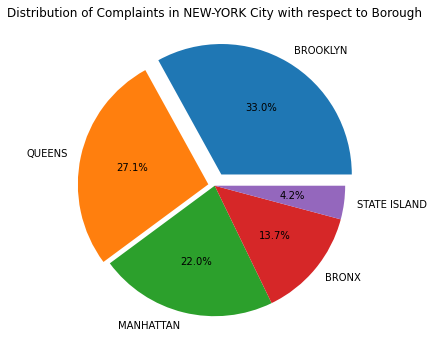

Here we can conclude that our maximum number of complaints are from Brooklyn i.e.
BROOKLYN         98113
QUEENS           80574
MANHATTAN        65503
BRONX            40594
STATEN ISLAND    12333
Name: Borough, dtype: int64


In [27]:
# Explore data for Borough
plt.figure(figsize=(8,6))
labels = "BROOKLYN","QUEENS","MANHATTAN","BRONX","STATE ISLAND"
explode = (0.10,0.05,0,0,0)
plt.pie(nyc_data['Borough'].value_counts(),labels=labels,explode=explode,autopct='%1.1f%%')
plt.title('Distribution of Complaints in NEW-YORK City with respect to Borough')
plt.show()
print ('Here we can conclude that our maximum number of complaints are from Brooklyn i.e.')
print(nyc_data.Borough.value_counts())


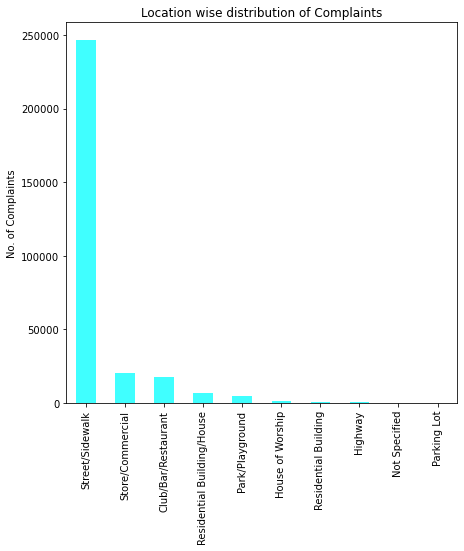

Location of maximum number of complaints are of Street/Sidewalk. 
Street/Sidewalk               246305
Store/Commercial               20125
Club/Bar/Restaurant            17199
Residential Building/House      6943
Park/Playground                 4646
House of Worship                 920
Residential Building             226
Highway                          213
Not Specified                    122
Parking Lot                      116
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             1
Name: Location Type, dtype: int64


In [28]:
# Explore data for Location type
# Breakdown of complaints with bar plot to figure out top 10 Location wise complaints.
plt.figure(figsize=(7,7))
nyc_data['Location Type'].value_counts().head(10).plot(kind='bar',color='cyan',alpha=.75)
plt.ylabel('No. of Complaints')
plt.title("Location wise distribution of Complaints")
plt.show()
print ("Location of maximum number of complaints are of Street/Sidewalk. ")
print (nyc_data['Location Type'].value_counts())

In [29]:
Location_wise_complaint= pd.DataFrame({'count':nyc_data.groupby(['Location Type','Complaint Type']).size()}).reset_index()
print('Here we have given the location of the complaint with respect to the type of complaint and their respective count.' )
Location_wise_complaint.head(10)

Here we have given the location of the complaint with respect to the type of complaint and their respective count.


,Location Type,Complaint Type,count
0,Bridge,Homeless Encampment,1
1,Club/Bar/Restaurant,Drinking,365
2,Club/Bar/Restaurant,Noise - Commercial,16813
3,Club/Bar/Restaurant,Urinating in Public,21
4,Commercial,Animal Abuse,62
5,Highway,Derelict Vehicle,13
6,Highway,Homeless Encampment,15
7,Highway,Traffic,185
8,House and Store,Animal Abuse,93
9,House of Worship,Noise - House of Worship,920


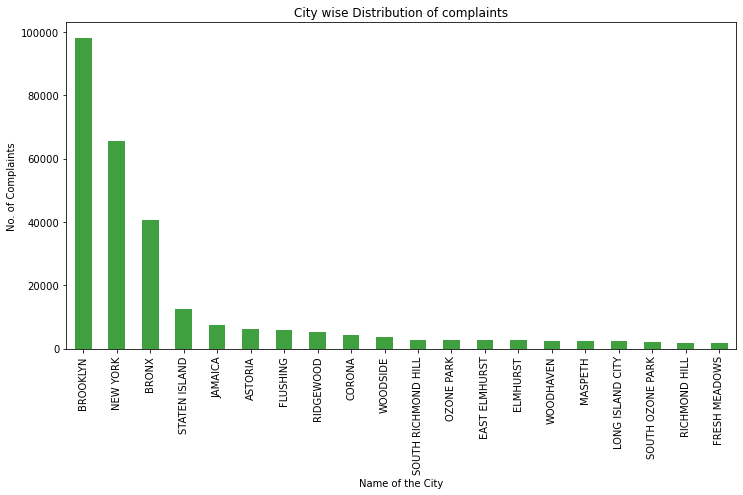

Our major insight here is that Brooklyn have maximum number of complaints in a city.


In [30]:
# Explore data for City
# Here we are showing top 20 city wise complaint.
plt.figure(figsize=(12,6))
nyc_data.City.value_counts().head(20).plot(kind='bar',color='g',alpha=.75)
plt.xlabel('Name of the City')
plt.ylabel('No. of Complaints')
plt.title("City wise Distribution of complaints")
plt.show()
print("Our major insight here is that Brooklyn have maximum number of complaints in a city.")

In [31]:
nyc_data.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough        Complaint Type       Descriptor               
BRONX          Animal Abuse         Chained                      132
                                    In Car                        36
                                    Neglected                    672
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
STATEN ISLAND  Traffic              Drag Racing                   18
                                    Truck Route Violation         13
               Urinating in Public  Not specified                 14
               Vending              In Prohibited Area             5
                                    Unlicensed                    20
Length: 274, dtype: int64

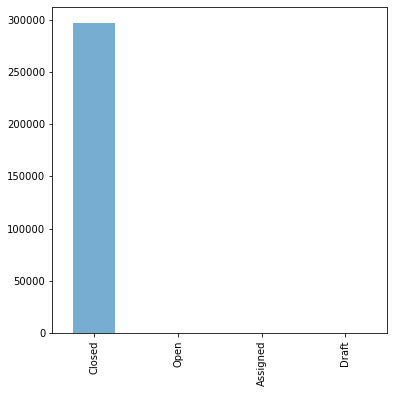

Closed      296998
Open            65
Assigned        52
Draft            2
Name: Status, dtype: int64
By the plot we can conclude that very few comlaints are open and assigned.


In [32]:
# Exploring the status of tickets
nyc_data['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(6,6))
plt.show()
print (nyc_data['Status'].value_counts())
print ("By the plot we can conclude that very few comlaints are open and assigned.")

In [36]:
# Q-4 Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

part_of_data=nyc_data[['City',"Complaint Type","Request_Closing_Time","Request_Closing_minutes"]]
part_of_data
print("Here we have shown the Request_Closing_Time of Comlaint Type in a descending order of time taken by the complaint to be resolved per Location(City)")
part_of_data.groupby(["City","Complaint Type"])["Request_Closing_minutes"].mean().to_frame().sort_values('Request_Closing_minutes',ascending=False)

Here we have shown the Request_Closing_Time of Comlaint Type in a descending order of time taken by the complaint to be resolved per Location(City)


,,Request_Closing_minutes
City,Complaint Type,
QUEENS VILLAGE,Graffiti,3200.0
BELLEROSE,Homeless Encampment,2348.0
SOUTH RICHMOND HILL,Bike/Roller/Skate Chronic,1854.0
OAKLAND GARDENS,Homeless Encampment,1719.0
FLORAL PARK,Animal Abuse,1594.0
...,...,...
OZONE PARK,Illegal Fireworks,19.0
EAST ELMHURST,Bike/Roller/Skate Chronic,15.0
RIDGEWOOD,Posting Advertisement,14.0


                          count
Complaint Type                 
Blocked Driveway          76722
Illegal Parking           74063
Noise - Street/Sidewalk   47770
Noise - Commercial        35164
Derelict Vehicle          17519
Noise - Vehicle           16873
Animal Abuse               7747
Traffic                    4474
Homeless Encampment        4366
Noise - Park               3929
Vending                    3776
Drinking                   1271
Noise - House of Worship    922
Posting Advertisement       649
Urinating in Public         592
Here the insight is that our maximum Complaint type is Blocked Driveway.


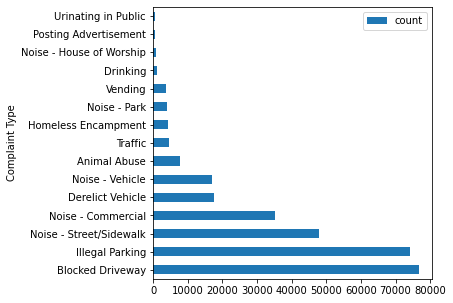

In [37]:
sorting_ComplaintType = nyc_data.groupby("Complaint Type").size().sort_values(ascending = False)
sorted_ComplaintType = sorting_ComplaintType.to_frame('count')
print(sorted_ComplaintType.head(15))

#Complaint type Breakdown with bar plot to show the above top 15 complaint types.
sorted_ComplaintType.head(15).plot(kind='barh',figsize=(5,5));
print("Here the insight is that our maximum Complaint type is Blocked Driveway.")

In [ ]:
# Q-5 Perform a statistical test for the following:
# For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.
    # 1- Whether the average response time across complaint types is similar or not (overall)
    # 2- Are the type of complaint or service requested and location related?

In [38]:
print ("Null Hypothesis: Average response time for all the complaints type is same.")
print ("Alternate Hypothesis: Average response time for all the complaints type is not same and there is some difference among the groups.")

Null Hypothesis: Average response time for all the complaints type is same.
Alternate Hypothesis: Average response time for all the complaints type is not same and there is some difference among the groups.


In [53]:
from scipy.stats import chi2_contingency

# defining the table
data = [nyc_data['Complaint Type'].value_counts(), nyc_data.groupby(["Complaint Type"])['Request_Closing_minutes'].mean()]

data

[Blocked Driveway             76722
 Illegal Parking              74063
 Noise - Street/Sidewalk      47770
 Noise - Commercial           35164
 Derelict Vehicle             17519
 Noise - Vehicle              16873
 Animal Abuse                  7747
 Traffic                       4474
 Homeless Encampment           4366
 Noise - Park                  3929
 Vending                       3776
 Drinking                      1271
 Noise - House of Worship       922
 Posting Advertisement          649
 Urinating in Public            592
 Bike/Roller/Skate Chronic      414
 Panhandling                    301
 Disorderly Youth               285
 Illegal Fireworks              163
 Graffiti                       113
 Squeegee                         4
 Name: Complaint Type, dtype: int64,
 Complaint Type
 Animal Abuse                 312.779140
 Bike/Roller/Skate Chronic    221.833333
 Blocked Driveway             283.962079
 Derelict Vehicle             440.501028
 Disorderly Youth          

In [57]:
chi2, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    
print ("As our p-value is quite low, hence it was converted to 0.0")
print ("Since our p-value is lower than our critical p-value, we will conclude that we have enough evidence to reject the Null Hypothesis and that average response time for all complaints type is not same.")

p value is 0.0
Dependent (reject H0)
As our p-value is quite low, hence it was converted to 0.0
Since our p-value is lower than our critical p-value, we will conclude that we have enough evidence to reject the Null Hypothesis and that average response time for all complaints type is not same.


In [58]:
# Now our last question is to find whether the type of complaint or service requested and location related? 
# For this we find the correlation betwwen location and cmplaint types.
print ("Since Our data in Complaint Type, Borough and City is Categorical hence we cannot directly apply corr() method.First, we will convert the categorical data to numerical data by mapping the category-to-category codes.")


Since Our data in Complaint Type, Borough and City is Categorical hence we cannot directly apply corr() method.First, we will convert the categorical data to numerical data by mapping the category-to-category codes.


In [66]:
sample=nyc_data[['Complaint Type',"Borough","City"]].astype("category")
sample["Complaint Type"]=sample["Complaint Type"].cat.codes
sample["Borough"]=sample["Borough"].cat.codes
sample["City"]=sample["City"].cat.codes
sample

,Complaint Type,Borough,City
0,13,2,33
1,2,3,1
2,2,0,6
3,9,0,6
4,9,3,13
...,...,...,...
300692,10,2,33
300694,2,3,39
300695,10,1,7
300696,10,0,6


In [67]:
sample2=nyc_data[["Longitude","Latitude"]]

In [69]:
result=sample.join(sample2)
result

,Complaint Type,Borough,City,Longitude,Latitude
0,13,2,33,-73.923501,40.865682
1,2,3,1,-73.915094,40.775945
2,2,0,6,-73.888525,40.870325
3,9,0,6,-73.828379,40.835994
4,9,3,13,-73.874170,40.733060
...,...,...,...,...,...
300692,10,2,33,-73.991378,40.716053
300694,2,3,39,-73.846087,40.694077
300695,10,1,7,-73.944234,40.699590
300696,10,0,6,-73.834587,40.837708


In [71]:
result.corr(method="pearson")

,Complaint Type,Borough,City,Longitude,Latitude
Complaint Type,1.000000,-0.067019,0.094409,-0.182721,0.154094
Borough,-0.067019,1.000000,0.717308,0.021320,-0.249491
City,0.094409,0.717308,1.000000,-0.122638,-0.000405
Longitude,-0.182721,0.021320,-0.122638,1.000000,0.364967
Latitude,0.154094,-0.249491,-0.000405,0.364967,1.000000


In [72]:
print ("As we can see from above table, there is no relationship between complaint type and location.")

As we can see from above table, there is no relationship between complaint type and location.


In [22]:
                                     Submitted By : Shubham Sharma
        
               
                #############################  Thank-You #############################